# **Importacion de librerias**

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# **Feedback**

## **EDA**

In [20]:
df_feedback = pd.read_excel('Viva-Tec-data.xlsx', sheet_name = "Feedback button")
df_feedback.head(5)

,Button name,Rating,Unnamed: 2,Comment,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,pnr,contact_number,NULL_pnr,¿Sobre qué te gustaría leer en el blog? - What would you like to read?,would_like_to_read,other_topics_comment,experiment,NULL_contact_number,NULL_other_topics_comment,NULL_name
0,Doters,1,Porque me inscribí y aparece un no ver qué no ...,2023-04-13 15:38:45,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Desktop New Site,2,Como hacer una reservación ???,2023-04-13 15:34:34,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Desktop New Site,2,"se quedo en ""cargando"" información del pasajero",2023-04-13 15:21:03,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Desktop New Site,1,NO ME PERMITE FACTURAR,2023-04-13 14:47:51,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Desktop New Site,4,mauro,2023-04-13 14:42:00,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


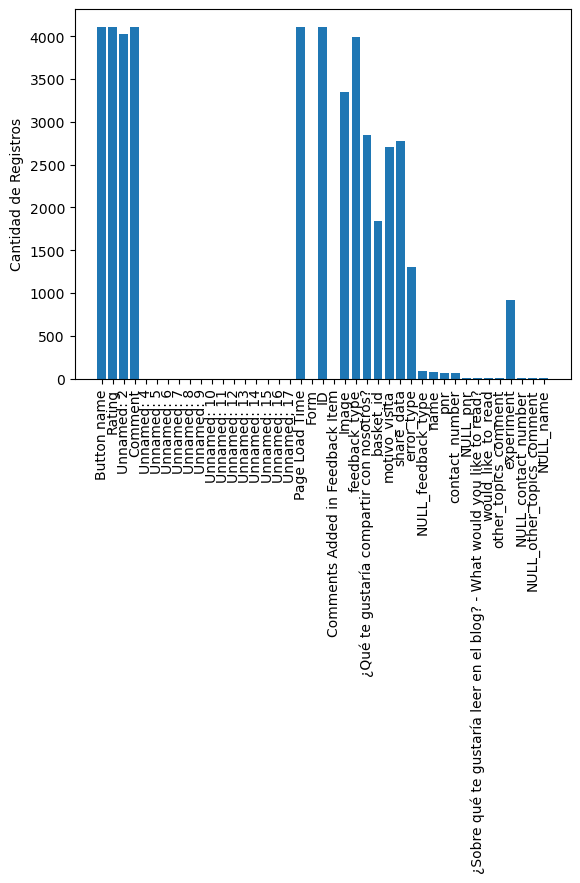

In [21]:
plt.bar(df_feedback.columns, df_feedback.count())
plt.ylabel('Cantidad de Registros')
plt.xticks(rotation = 90)
plt.show()

## **Eliminacion de columnas**

**Eliminamos las columnas con  registros nulos**

In [22]:
df_feedback = df_feedback.dropna(axis=1, how='all')
# Eliminamos columnas con menos de 10 registros
df_feedback = df_feedback.loc[:, df_feedback.notnull().sum() >= 1000]
df_feedback.head(5)


,Button name,Rating,Unnamed: 2,Comment,Page Load Time,ID,Image,feedback_type,¿Qué te gustaría compartir con nosotros?,basket_id,motivo_visita,share_data,error_type
0,Doters,1,Porque me inscribí y aparece un no ver qué no ...,2023-04-13 15:38:45,4s,6438684c4e609416265a00d2,NaN,general,NaN,NaN,NaN,NaN,NaN
1,Desktop New Site,2,Como hacer una reservación ???,2023-04-13 15:34:34,1s,6438674f4bc597141e1fa44b,https://u4w-screenshots-production.s3.amazonaw...,general,Comentario general,undefined,book_flight,yes,NaN
2,Desktop New Site,2,"se quedo en ""cargando"" información del pasajero",2023-04-13 15:21:03,4s,64386424b082ae6311679d33,https://u4w-screenshots-production.s3.amazonaw...,error,Errores o problemas en la página,undefined,book_flight,no,website_not_loading
3,Desktop New Site,1,NO ME PERMITE FACTURAR,2023-04-13 14:47:51,0s,64385c5418565b593924bc97,https://u4w-screenshots-production.s3.amazonaw...,error,Errores o problemas en la página,undefined,search_info,si,invoice
4,Desktop New Site,4,mauro,2023-04-13 14:42:00,3s,64385afc146d2374dd64b00e,https://u4w-screenshots-production.s3.amazonaw...,compliment,Felicitación,undefined,book_flight,yes,NaN


**Eliminamos una columna de relleno**

In [23]:
df_feedback.drop('Image', axis=1, inplace=True)

## **Renombramos y modificamos valores de las columnas para evitar registros nulos**

In [24]:
df_feedback = df_feedback.rename(columns={'Unnamed: 2': 'Comments', 'Comment': 'Date'})
df_feedback['Page Load Time'] = df_feedback['Page Load Time'].str.replace('s', '')
df_feedback['Page Load Time'] = df_feedback['Page Load Time'].fillna(value=3000)
df_feedback['Page Load Time'] = df_feedback['Page Load Time'].astype(int)
df_feedback['Page Load Time'] = df_feedback['Page Load Time'].replace(3000, np.nan)
df_feedback['Comments'].fillna('Ninguno', inplace=True)
df_feedback['Page Load Time'].fillna(df_feedback['Page Load Time'].mean(), inplace=True)
df_feedback['feedback_type'].fillna('Unknown', inplace=True)
df_feedback['basket_id'] = df_feedback['basket_id'].fillna(value=False).astype(bool)
df_feedback['¿Qué te gustaría compartir con nosotros?'].fillna('Nada', inplace=True)
df_feedback['motivo_visita'].fillna('Unknown', inplace=True)
df_feedback['share_data'].fillna('no', inplace=True)
df_feedback['share_data'].replace(['si', 'yes'], True, inplace=True)
df_feedback['share_data'].replace('no', False, inplace=True)
df_feedback['error_type'].fillna('Unknown', inplace=True)
df_feedback.head(5)

,Button name,Rating,Comments,Date,Page Load Time,ID,feedback_type,¿Qué te gustaría compartir con nosotros?,basket_id,motivo_visita,share_data,error_type
0,Doters,1,Porque me inscribí y aparece un no ver qué no ...,2023-04-13 15:38:45,4.0,6438684c4e609416265a00d2,general,Nada,False,Unknown,False,Unknown
1,Desktop New Site,2,Como hacer una reservación ???,2023-04-13 15:34:34,1.0,6438674f4bc597141e1fa44b,general,Comentario general,True,book_flight,True,Unknown
2,Desktop New Site,2,"se quedo en ""cargando"" información del pasajero",2023-04-13 15:21:03,4.0,64386424b082ae6311679d33,error,Errores o problemas en la página,True,book_flight,False,website_not_loading
3,Desktop New Site,1,NO ME PERMITE FACTURAR,2023-04-13 14:47:51,0.0,64385c5418565b593924bc97,error,Errores o problemas en la página,True,search_info,True,invoice
4,Desktop New Site,4,mauro,2023-04-13 14:42:00,3.0,64385afc146d2374dd64b00e,compliment,Felicitación,True,book_flight,True,Unknown


## **Confirmamos y lo exportamos a un nuevo csv**

In [26]:
df_feedback.columns

Index(['Button name', 'Rating', 'Comments', 'Date', 'Page Load Time', 'ID',
       'feedback_type', '¿Qué te gustaría compartir con nosotros?',
       'basket_id', 'motivo_visita', 'share_data', 'error_type'],
      dtype='object')

In [27]:
df_feedback['Rating'].value_counts()

1    2193
2     993
3     348
4     335
5     241
Name: Rating, dtype: int64

In [ ]:
df_feedback.isnull().sum()

Button name                                 0
Rating                                      0
Comments                                    0
Date                                        0
Page Load Time                              0
ID                                          0
feedback_type                               0
¿Qué te gustaría compartir con nosotros?    0
basket_id                                   0
motivo_visita                               0
share_data                                  0
error_type                                  0
dtype: int64

In [ ]:
df_feedback.to_csv('df_feedback.csv', index=False)